In [102]:
import torch
import torch.nn as nn
import numpy as np
from functools import partial

from torch.optim.lr_scheduler import StepLR

from model import NN
from functions import gaussian_loss_function
from train import training_routine, testing_routine
from visuals import plot_transformed_grid_and_density, compute_gaussian_density, compute_uniform_circle_density

In [114]:
from matplotlib import pyplot as plt
%matplotlib inline

torch.set_default_dtype(torch.float64)
torch.manual_seed(2)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
device

def generate_ellipse(max_num = 10000, scale=(0.5,0.2), device='cpu'):
    data = (torch.rand((max_num,2), device=device)-0.5)*2
    dist = torch.sum(torch.square(data),axis=1)
    data = data[torch.where(dist <= 1)]
    data *= torch.tensor(scale, device=device)
    return data

training_set = generate_ellipse(max_num=100000, scale=(0.5,0.2), device=device)
validation_set = generate_ellipse(max_num=10000, scale=(0.5,0.2), device=device)
#plt.scatter(np.array(train_loader.cpu())[:,0], np.array(train_loader.cpu())[:,1])

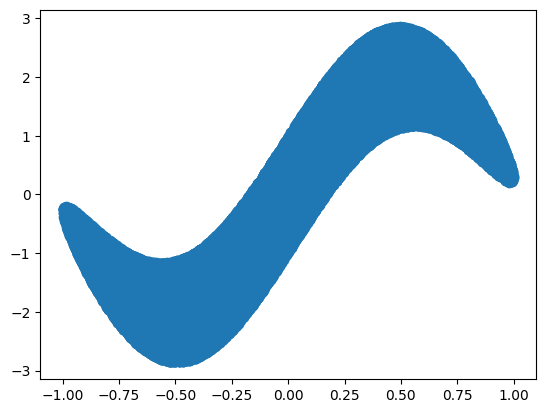

In [115]:
def generate_wave(n=100000, device='cpu'):
    train_loader = generate_ellipse(n, (1,1), device)
    train_loader[:, 1] = train_loader[:,1] + 2*torch.sin(3*train_loader[:,0])
    return train_loader
training_set = generate_wave(n=100000, device=device)
validation_set = generate_wave(n=10000, device=device)
plt.scatter(np.array(training_set.cpu())[:,0], np.array(training_set.cpu())[:,1])

In [67]:
model = NN(num_coupling_layers=30, split_size_x1=1, nn_size=(1, 10)).to(device)
##testNN = NN(num_coupling_layers=119, split_size_x1=1, nn_size=(1, 10)).to(device)
model.train()
model

NN(
  (layers): ModuleList(
    (0-29): 30 x CouplingLayer(
      (t_net): ModuleList(
        (0): Linear(in_features=1, out_features=10, bias=True)
        (1): Linear(in_features=10, out_features=10, bias=True)
        (2): Linear(in_features=10, out_features=1, bias=True)
      )
      (s_net): ModuleList(
        (0): Linear(in_features=1, out_features=10, bias=True)
        (1): Linear(in_features=10, out_features=10, bias=True)
        (2): Linear(in_features=10, out_features=1, bias=True)
      )
      (activation): ReLU()
    )
  )
)

In [69]:
# Create data loaders for our datasets; shuffle for training, not for validation
train_loader = torch.utils.data.DataLoader(training_set, batch_size=1024, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)

In [70]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.8, momentum=0.8)
scheduler = StepLR(optimizer, step_size=1, gamma=0.95)
num_epoch = 20

In [71]:
scheduler.get_last_lr()

[0.8]

In [72]:
num_epoch = 20
batch_size = 1024  # Batch size must be very large! otherwise density gets concentrated if next data point is not in reach
for epoch in range(num_epoch):
    print(epoch)
    training_routine(model, train_loader, optimizer, gaussian_loss_function) 
    print(testing_routine(model, validation_loader, gaussian_loss_function))
    scheduler.step()

0


77it [00:09,  8.32it/s]
62it [00:01, 32.04it/s]


tensor(9898.6162, device='cuda:0')
1


77it [00:09,  8.18it/s]
62it [00:01, 31.59it/s]


tensor(8758.2701, device='cuda:0')
2


77it [00:09,  8.38it/s]
62it [00:01, 34.46it/s]


tensor(7940.2723, device='cuda:0')
3


77it [00:09,  8.34it/s]
62it [00:01, 31.89it/s]


tensor(7081.8767, device='cuda:0')
4


77it [00:09,  8.19it/s]
62it [00:01, 31.17it/s]


tensor(6249.8192, device='cuda:0')
5


77it [00:09,  8.15it/s]
62it [00:02, 30.83it/s]


tensor(5470.5173, device='cuda:0')
6


77it [00:09,  8.37it/s]
62it [00:01, 32.13it/s]


tensor(6049.7243, device='cuda:0')
7


77it [00:09,  8.33it/s]
62it [00:01, 32.06it/s]


tensor(5693.1120, device='cuda:0')
8


77it [00:09,  8.30it/s]
62it [00:01, 32.38it/s]


tensor(5123.2661, device='cuda:0')
9


77it [00:09,  8.24it/s]
62it [00:01, 31.02it/s]


tensor(5441.9923, device='cuda:0')
10


77it [00:09,  8.32it/s]
62it [00:01, 31.93it/s]


tensor(5267.9800, device='cuda:0')
11


77it [00:09,  8.17it/s]
62it [00:01, 31.71it/s]


tensor(5102.7598, device='cuda:0')
12


77it [00:09,  8.18it/s]
62it [00:01, 31.93it/s]


tensor(5000.8958, device='cuda:0')
13


77it [00:09,  8.01it/s]
62it [00:01, 31.57it/s]


tensor(4946.4997, device='cuda:0')
14


77it [00:09,  8.21it/s]
62it [00:01, 31.43it/s]


tensor(4989.2170, device='cuda:0')
15


77it [00:09,  8.21it/s]
62it [00:01, 32.25it/s]


tensor(4809.9506, device='cuda:0')
16


77it [00:09,  8.16it/s]
62it [00:01, 32.02it/s]


tensor(4879.1241, device='cuda:0')
17


77it [00:09,  8.09it/s]
62it [00:01, 31.79it/s]


tensor(4706.7235, device='cuda:0')
18


77it [00:09,  8.11it/s]
62it [00:01, 33.52it/s]


tensor(4928.2895, device='cuda:0')
19


77it [00:09,  8.13it/s]
62it [00:01, 31.13it/s]

tensor(4647.0463, device='cuda:0')


D:\master-thesis\acl\visuals.py:114: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  output = model(torch.tensor(sampling_data, device=device), reverse=True)


0

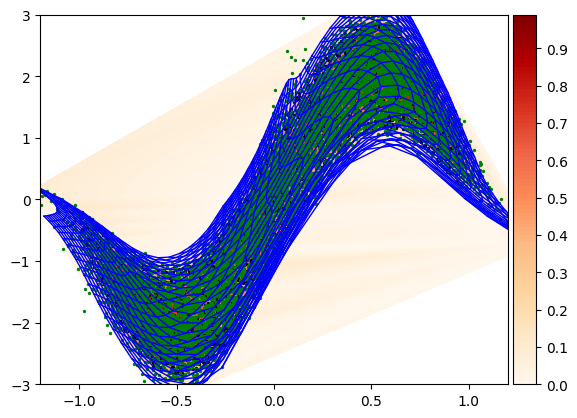

In [73]:
scale=1
factor=3

sampling_data = torch.tensor(np.random.normal(size=(10000,2)))
plot_transformed_grid_and_density(model, training_set.to('cpu'), device, sampling_data, grid_width=30,
                                x_range=(-factor, factor), y_range=(-factor, factor), x_lim=(-1.2*scale,1.2*scale), y_lim=(-3*scale,3*scale),
                                density_function=compute_gaussian_density)

In [81]:
training_set = generate_ellipse(max_num=100000, scale=(0.5,0.2), device=device)
validation_set = generate_ellipse(max_num=10000, scale=(0.5,0.2), device=device)

In [86]:
model_circle = NN(num_coupling_layers=30, split_size_x1=1, nn_size=(1, 10)).to(device)
##testNN = NN(num_coupling_layers=119, split_size_x1=1, nn_size=(1, 10)).to(device)
model_circle.train()
model_circle

NN(
  (layers): ModuleList(
    (0-29): 30 x CouplingLayer(
      (t_net): ModuleList(
        (0): Linear(in_features=1, out_features=10, bias=True)
        (1): Linear(in_features=10, out_features=10, bias=True)
        (2): Linear(in_features=10, out_features=1, bias=True)
      )
      (s_net): ModuleList(
        (0): Linear(in_features=1, out_features=10, bias=True)
        (1): Linear(in_features=10, out_features=10, bias=True)
        (2): Linear(in_features=10, out_features=1, bias=True)
      )
      (activation): ReLU()
    )
  )
)

In [87]:
# Create data loaders for our datasets; shuffle for training, not for validation
train_loader = torch.utils.data.DataLoader(training_set, batch_size=1024, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)

In [88]:
optimizer = torch.optim.SGD(model_circle.parameters(), lr=0.8, momentum=0.8)
scheduler = StepLR(optimizer, step_size=1, gamma=0.95)
num_epoch = 20

In [89]:
num_epoch = 20
batch_size = 1024  # Batch size must be very large! otherwise density gets concentrated if next data point is not in reach
for epoch in range(num_epoch):
    print(epoch)
    training_routine(model_circle, train_loader, optimizer, gaussian_loss_function) 
    print(testing_routine(model_circle, validation_loader, gaussian_loss_function))
    scheduler.step()

0


77it [00:09,  8.31it/s]
62it [00:01, 31.17it/s]


tensor(-12085.6339, device='cuda:0')
1


77it [00:09,  8.20it/s]
62it [00:01, 31.97it/s]


tensor(-12269.7522, device='cuda:0')
2


77it [00:09,  8.18it/s]
62it [00:02, 29.27it/s]


tensor(-12279.1821, device='cuda:0')
3


77it [00:09,  8.13it/s]
62it [00:01, 32.23it/s]


tensor(-12475.2630, device='cuda:0')
4


77it [00:09,  7.96it/s]
62it [00:01, 32.23it/s]


tensor(-12593.2412, device='cuda:0')
5


77it [00:09,  8.29it/s]
62it [00:01, 32.42it/s]


tensor(-12701.9627, device='cuda:0')
6


77it [00:09,  8.22it/s]
62it [00:01, 31.30it/s]


tensor(-12720.6079, device='cuda:0')
7


77it [00:09,  8.17it/s]
62it [00:01, 32.16it/s]


tensor(-12987.9117, device='cuda:0')
8


77it [00:09,  8.26it/s]
62it [00:01, 31.57it/s]


tensor(-12878.7065, device='cuda:0')
9


77it [00:09,  8.21it/s]
62it [00:01, 31.88it/s]


tensor(-12950.1467, device='cuda:0')
10


77it [00:09,  8.25it/s]
62it [00:01, 31.32it/s]


tensor(-13258.7973, device='cuda:0')
11


77it [00:09,  8.19it/s]
62it [00:01, 32.07it/s]


tensor(-13164.8529, device='cuda:0')
12


77it [00:09,  8.16it/s]
62it [00:01, 31.35it/s]


tensor(-13398.0617, device='cuda:0')
13


77it [00:09,  8.18it/s]
62it [00:01, 31.96it/s]


tensor(-13429.9243, device='cuda:0')
14


77it [00:09,  8.15it/s]
62it [00:01, 32.30it/s]


tensor(-13592.2830, device='cuda:0')
15


77it [00:09,  8.18it/s]
62it [00:01, 31.43it/s]


tensor(-13473.6871, device='cuda:0')
16


77it [00:09,  8.18it/s]
62it [00:01, 32.08it/s]


tensor(-13676.9151, device='cuda:0')
17


77it [00:09,  8.14it/s]
62it [00:01, 32.16it/s]


tensor(-13656.8508, device='cuda:0')
18


77it [00:09,  8.12it/s]
62it [00:01, 31.11it/s]


tensor(-13680.8882, device='cuda:0')
19


77it [00:09,  8.11it/s]
62it [00:01, 31.66it/s]

tensor(-13840.0792, device='cuda:0')


0

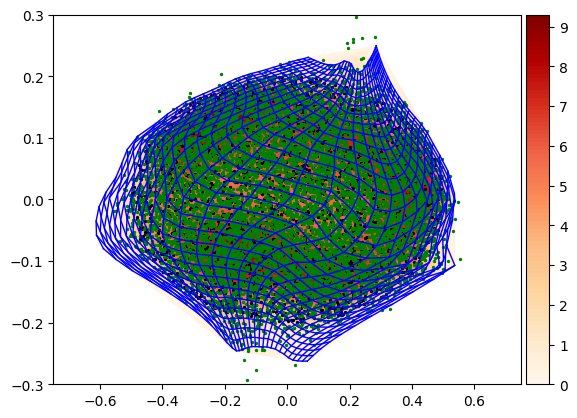

In [90]:
scale=1.5
factor=3

sampling_data = torch.tensor(np.random.normal(size=(10000,2)))
plot_transformed_grid_and_density(model_circle, training_set.to('cpu'), device, sampling_data, grid_width=30,
                                x_range=(-factor, factor), y_range=(-factor, factor), x_lim=(-0.5*scale,0.5*scale), y_lim=(-0.2*scale,0.2*scale),
                                density_function=compute_gaussian_density)

In [91]:
sampling_data = generate_ellipse(10900, (0.5, 0.2), device=device) 

with torch.no_grad():
    transformed = model(model_circle(sampling_data), reverse=True)

In [92]:
transformed

tensor([[-0.7063, -1.3697],
        [-0.1303, -0.8871],
        [ 0.1828,  0.8498],
        ...,
        [-0.9005, -0.9501],
        [ 0.1417,  0.5614],
        [ 0.2326,  0.8215]], device='cuda:0')

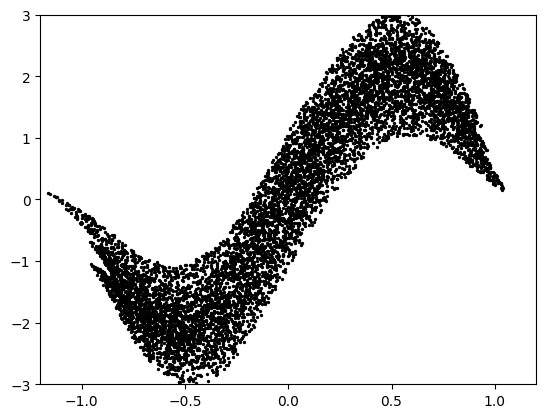

In [93]:
transformed = transformed.detach().to('cpu')

factor = 1
scale = 1

x_range=(-factor, factor)
y_range=(-factor, factor)
x_lim=(-1.2*scale,1.2*scale)
y_lim=(-3*scale,3*scale)

fig, ax = plt.subplots()

plt.xlim(*x_lim)
plt.ylim(*y_lim)

ax.scatter(transformed[:,0], transformed[:,1], c='black', alpha=1, s=2)

## In comparison if we use uniform distribution for log likelihood loss function

In [124]:
testNN = NN(num_coupling_layers=30, layer_size=2, split_size_x1=1, nn_size=(1, 10)).to(device)
testNN.train()
testNN

NN(
  (layers): ModuleList(
    (0-29): 30 x CouplingLayer(
      (t_net): ModuleList(
        (0): Linear(in_features=1, out_features=10, bias=True)
        (1): Linear(in_features=10, out_features=10, bias=True)
        (2): Linear(in_features=10, out_features=1, bias=True)
      )
      (s_net): ModuleList(
        (0): Linear(in_features=1, out_features=10, bias=True)
        (1): Linear(in_features=10, out_features=10, bias=True)
        (2): Linear(in_features=10, out_features=1, bias=True)
      )
      (activation): ReLU()
    )
  )
)

In [125]:
# Create data loaders for our datasets; shuffle for training, not for validation
train_loader = torch.utils.data.DataLoader(training_set, batch_size=1024, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)

In [126]:
from torch.optim.lr_scheduler import StepLR

optimizer = torch.optim.SGD(testNN.parameters(), lr=0.8, momentum=0.8)
scheduler = StepLR(optimizer, step_size=1, gamma=0.95)
num_epoch = 20

In [130]:
from functions import uniform_circle_loss_function_method2

num_epoch = 20
for epoch in range(num_epoch):
    training_routine(testNN, train_loader, optimizer, uniform_circle_loss_function_method2) 
    print(testing_routine(testNN, validation_loader, uniform_circle_loss_function_method2))
    scheduler.step()

77it [00:09,  8.39it/s]
62it [00:02, 28.74it/s]


tensor(6767.9961, device='cuda:0')


77it [00:09,  8.29it/s]
62it [00:01, 31.88it/s]


tensor(3183.4838, device='cuda:0')


77it [00:09,  7.92it/s]
62it [00:01, 31.20it/s]


tensor(2985.7853, device='cuda:0')


77it [00:09,  7.92it/s]
62it [00:02, 30.33it/s]


tensor(4275.7457, device='cuda:0')


77it [00:09,  8.26it/s]
62it [00:01, 32.30it/s]


tensor(6228.3593, device='cuda:0')


77it [00:09,  8.17it/s]
62it [00:02, 30.62it/s]


tensor(2838.6433, device='cuda:0')


77it [00:09,  8.31it/s]
62it [00:01, 31.79it/s]


tensor(3532.7796, device='cuda:0')


77it [00:09,  8.30it/s]
62it [00:02, 30.71it/s]


tensor(2276.9529, device='cuda:0')


77it [00:09,  8.44it/s]
62it [00:01, 31.56it/s]


tensor(3931.3502, device='cuda:0')


77it [00:09,  8.44it/s]
62it [00:02, 30.54it/s]


tensor(7627.5845, device='cuda:0')


77it [00:09,  8.42it/s]
62it [00:01, 31.04it/s]


tensor(2265.9411, device='cuda:0')


77it [00:09,  8.17it/s]
62it [00:02, 30.92it/s]


tensor(2715.8930, device='cuda:0')


77it [00:09,  8.29it/s]
62it [00:01, 31.36it/s]


tensor(2354.2742, device='cuda:0')


77it [00:09,  8.53it/s]
62it [00:01, 32.29it/s]


tensor(2746.4224, device='cuda:0')


77it [00:09,  8.25it/s]
62it [00:01, 31.89it/s]


tensor(2251.6858, device='cuda:0')


77it [00:09,  8.46it/s]
62it [00:01, 31.27it/s]


tensor(1910.4046, device='cuda:0')


77it [00:09,  8.40it/s]
62it [00:01, 31.33it/s]


tensor(2466.7448, device='cuda:0')


77it [00:09,  8.22it/s]
62it [00:01, 31.38it/s]


tensor(2267.4956, device='cuda:0')


77it [00:09,  8.15it/s]
62it [00:01, 31.13it/s]


tensor(2225.2159, device='cuda:0')


77it [00:09,  8.10it/s]
62it [00:01, 31.28it/s]

tensor(1973.5580, device='cuda:0')


0

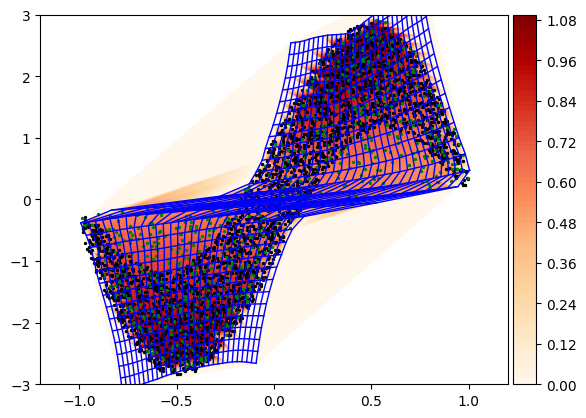

In [131]:
scale=1
factor=1

sampling_data = generate_ellipse(1000, (1, 1))
plot_transformed_grid_and_density(testNN, training_set.to('cpu'), device, sampling_data, grid_width=30,
                                x_range=(-factor, factor), y_range=(-factor, factor), x_lim=(-1.2*scale,1.2*scale), y_lim=(-3*scale,3*scale),
                                density_function=compute_uniform_circle_density)

In [91]:
sampling_data

tensor(997.6569)

In [478]:
layers = []
for j in range(len(testNN.layers)):
    layers.append("layers.{}".format(j))
print(layers)
saved_layers = register_activation_hooks(testNN, layers_to_save=layers)

['layers.0']


In [479]:
output = testNN(train_set)

tensor([[0., 0.],
        [0., 0.]])
tensor([[1.0208, 1.0000],
        [1.9525, 2.0000]], grad_fn=<CopySlices>) tensor([-0.0812, -0.1003], grad_fn=<SumBackward1>)


In [480]:
saved_layers

{'layers.0': [(tensor([[1.0208, 1.0000],
           [1.9525, 2.0000]], grad_fn=<CopySlices>),
   tensor([-0.0812, -0.1003], grad_fn=<SumBackward1>))]}

In [481]:
output

tensor([[1.0208, 1.0000],
        [1.9525, 2.0000]], grad_fn=<CopySlices>)

In [482]:
def gaussian_loss_function(output, layers):
    N, D = output.shape  # batch size and single output size
    #print(layers)
    """First summand"""
    constant = torch.from_numpy(np.array(0.5 * D * N * np.log(np.pi))).type(torch.float32)

    """Second summand"""
    sum_squared_mappings = torch.square(output)
    sum_squared_mappings = torch.sum(sum_squared_mappings)
    sum_squared_mappings = 0.5 * sum_squared_mappings

    """Determinants"""
    temp = [torch.reshape(layers[f'layers.{i}'][0][1], (-1, 1)) for i in range(len(layers))]
    log_dets = torch.cat(temp, axis=1)
    sum_log_dets = torch.sum(log_dets)

    #reset_computation_graph_term =  sum([layers[f'layers.{i}'][0][0].sum() for i in range(len(layers))])*0
    # for i in range(len(layers)):
    #     layers[f'layers.{i}'][0][0].detach_()
    
    
    return constant + sum_squared_mappings - sum_log_dets #+ reset_computation_graph_term

In [483]:
loss = gaussian_loss_function(output, saved_layers)

In [484]:
loss

tensor(7.3981, grad_fn=<SubBackward0>)

In [485]:
loss.backward()

RuntimeError: Trying to use a saved tensor that has been detached in-place, i.e. with .detach_().This is not supported, please use out-of-place `.detach()` instead

In [460]:
for l in testNN.layers[0].t_net:
    print(l.weight.grad)
print('aa')
for l in testNN.layers[0].s_net:
    print(l.weight.grad)


tensor([[ 0.0298],
        [-0.0199],
        [ 0.0000],
        [ 0.0161],
        [ 0.0557],
        [-0.0491],
        [-0.0266],
        [-0.0078],
        [ 0.0743],
        [ 0.0000]])
tensor([[ 0.0010,  0.0251,  0.0000,  0.0148,  0.0300,  0.0052,  0.0104,  0.0242,
          0.0185,  0.0000],
        [ 0.0019,  0.0455,  0.0000,  0.0269,  0.0544,  0.0095,  0.0188,  0.0438,
          0.0335,  0.0000],
        [-0.0022, -0.0548, -0.0000, -0.0324, -0.0655, -0.0114, -0.0226, -0.0527,
         -0.0403, -0.0000],
        [-0.0017, -0.0417, -0.0000, -0.0246, -0.0499, -0.0087, -0.0172, -0.0401,
         -0.0307, -0.0000],
        [-0.0023, -0.0556, -0.0000, -0.0328, -0.0665, -0.0116, -0.0229, -0.0535,
         -0.0409, -0.0000],
        [-0.0022, -0.0535, -0.0000, -0.0316, -0.0640, -0.0112, -0.0221, -0.0515,
         -0.0393, -0.0000],
        [ 0.0032,  0.0792,  0.0000,  0.0468,  0.0947,  0.0165,  0.0327,  0.0763,
          0.0583,  0.0000],
        [ 0.0028,  0.0686,  0.0000,  0.0405,  

In [313]:
saved_layers, output

({'layers.0': [(tensor([[1.0000, 1.3754]], grad_fn=<CopySlices>),
    tensor([0.0685], grad_fn=<SumBackward1>))]},
 tensor([[1.0000, 1.3754]], grad_fn=<CopySlices>))

In [297]:
a = [torch.reshape(saved_layers[f'layers.{i}'][0][1], (-1, 1)) for i in range(len(saved_layers))]

In [298]:
loss = 2*a[0]

In [474]:
saved_layers[f'layers.{0}'][0][0].detach_()

tensor([[1.0208, 1.0000],
        [1.9525, 2.0000]])

In [475]:
saved_layers

{'layers.0': [(tensor([[1.0208, 1.0000],
           [1.9525, 2.0000]]),
   tensor([-0.0812, -0.1003], grad_fn=<SumBackward1>))]}